In [12]:
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
import adj_admit_train_prophet as train_model

In [13]:
region = 'Southern California'

In [14]:
df = pd.read_csv("data/Adj_admits_historical.csv")
df = df[df["REGION"] == region]
df = df.reset_index(drop=True)
df.rename(columns={"MONTH_END": "ds", "ADJ_ADMIT": 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds']).dt.to_period('M').dt.to_timestamp()
df = df.sort_values(by='ds', ascending=True).reset_index(drop=True)
df.drop(columns='REGION', inplace=True)
df_train_val = df.iloc[:-3]
df_train_val

,ds,y
0,2019-01-01,25255.18
1,2019-02-01,23169.12
2,2019-03-01,24828.24
3,2019-04-01,24542.29
4,2019-05-01,24741.19
...,...,...
62,2024-03-01,24752.71
63,2024-04-01,24130.34
64,2024-05-01,24859.06
65,2024-06-01,24222.15


In [15]:
df_test = df.iloc[-3:]
df_test

,ds,y
67,2024-08-01,25126.73
68,2024-09-01,23935.02
69,2024-10-01,25592.42


In [16]:
model = train_model.ForecastingModel(df_train_val, df_test)

In [17]:
model.df_train_val

,ds,y,lag,rolling_3_month_avg,rolling_3_month_std
3,2019-04-01,24542.29,25255.18,24179.883333,886.946299
4,2019-05-01,24741.19,23169.12,24703.906667,146.575529
5,2019-06-01,23352.94,24828.24,24212.140000,750.705523
6,2019-07-01,25118.00,24542.29,24404.043333,929.575229
7,2019-08-01,24595.42,24741.19,24355.453333,906.668187
...,...,...,...,...,...
62,2024-03-01,24752.71,23405.33,23854.670000,1372.834275
63,2024-04-01,24130.34,24536.94,23719.136667,1289.329600
64,2024-05-01,24859.06,22274.36,24580.703333,393.634259
65,2024-06-01,24222.15,24752.71,24403.850000,396.887109


In [18]:
model.train_model()

     changepoint_prior_scale  seasonality_prior_scale  changepoint_range  \
0                      0.001                      0.3               0.95   
1                      0.001                      0.3               0.95   
2                      0.001                      0.3               0.80   
3                      0.001                      0.3               0.80   
4                      0.001                      0.6               0.95   
..                       ...                      ...                ...   
427                    0.500                      9.0               0.80   
428                    0.500                     10.0               0.95   
429                    0.500                     10.0               0.95   
430                    0.500                     10.0               0.80   
431                    0.500                     10.0               0.80   

    seasonality_mode      mape  
0           additive  4.515375  
1     multiplicative 

In [19]:
model.test_model()

11:52:23 - cmdstanpy - INFO - Chain [1] start processing
11:52:23 - cmdstanpy - INFO - Chain [1] done processing


Final Model MAE: 295.30, MAPE: 1.18%, MSE: 169080.84, RMSE: 411.19
[25126.73 23935.02 25592.42] [24427.40571695 24048.11647113 25518.95388656]


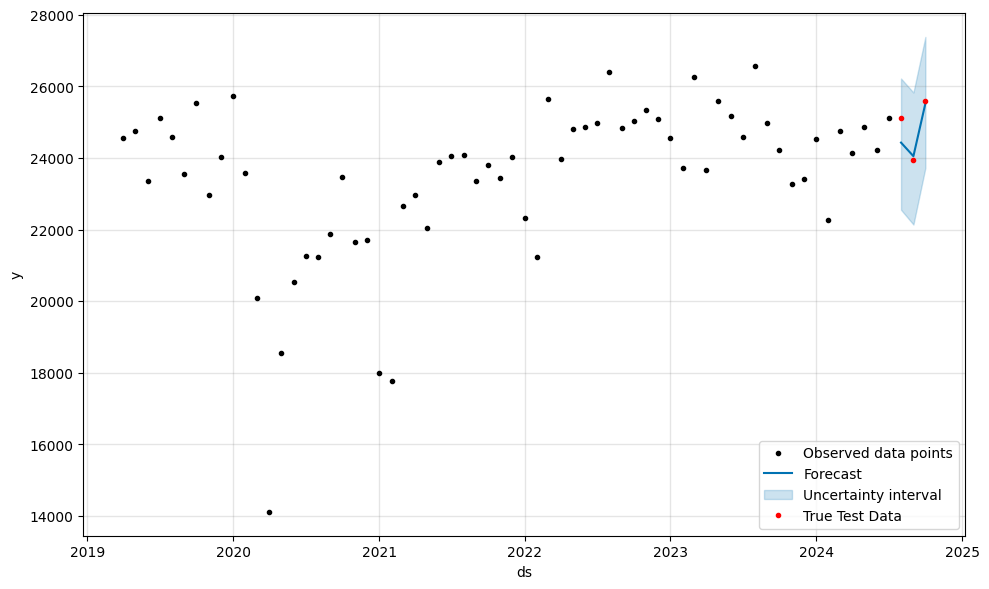

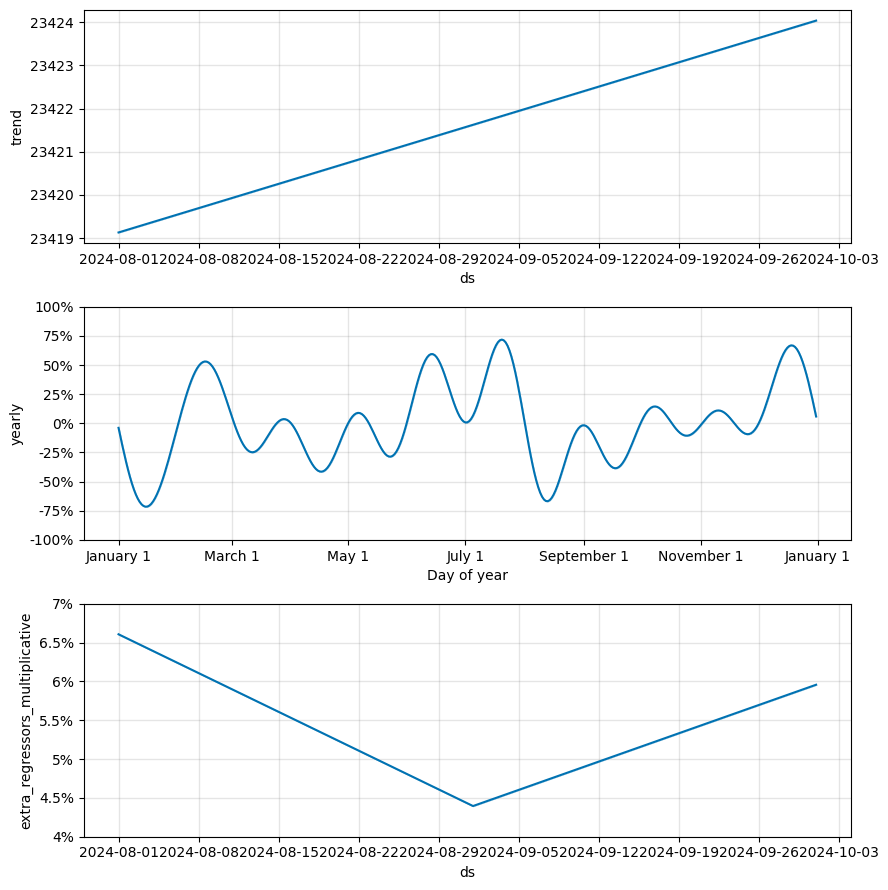

In [20]:
model.plot_results()

In [21]:
model.best_params

{'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 0.3,
 'changepoint_range': 0.95,
 'seasonality_mode': 'multiplicative',
 'mape': 4.45658644937409}

In [22]:
model.publish_results(f"forecasts/adj_admits/{region}.csv", model.prod_forecast(df))


this is final_df:            ds         y       lag  rolling_3_month_avg  rolling_3_month_std
3  2019-04-01  24542.29  25255.18         24179.883333           886.946299
4  2019-05-01  24741.19  23169.12         24703.906667           146.575529
5  2019-06-01  23352.94  24828.24         24212.140000           750.705523
6  2019-07-01  25118.00  24542.29         24404.043333           929.575229
7  2019-08-01  24595.42  24741.19         24355.453333           906.668187
..        ...       ...       ...                  ...                  ...
65 2024-06-01  24222.15  24752.71         24403.850000           396.887109
66 2024-07-01  25105.49  24130.34         24728.900000           455.827388
67 2024-08-01  25126.73  24859.06         24818.123333           516.237295
68 2024-09-01  23935.02  24222.15         24722.413333           681.985323
69 2024-10-01  25592.42  25105.49         24884.723333           854.791852

[67 rows x 5 columns]


11:52:25 - cmdstanpy - INFO - Chain [1] start processing
11:52:26 - cmdstanpy - INFO - Chain [1] done processing
